# NOYCE Internship Paper Visual Plot

In [144]:
# importing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [145]:
# loading dataset
student_data = pd.read_csv('Noyce_data.csv', index_col=False)

In [146]:
student_data

,Student,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,S1,4.0,3.3,3.3,3.7,4.3,3.0,2.7,3.3,3.0,4.5,3.5,4.5
1,S2,4.0,3.5,5.0,4.0,4.0,3.5,4.0,4.0,3.5,4.5,4.0,3.5
2,S3,4.3,4.0,3.7,4.3,4.3,3.7,4.3,4.5,4.0,5.0,4.5,4.0
3,S4,4.0,4.0,4.0,4.0,4.0,4.0,3.5,4.0,3.5,4.0,5.0,4.0
4,S5,4.0,4.3,4.0,4.0,4.3,4.3,4.0,4.0,4.0,4.3,4.5,4.0
5,S6,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.5,4.0,4.0
6,S7,4.3,4.0,4.3,4.3,4.7,4.7,4.0,4.7,4.0,4.3,4.3,5.0
7,S8,3.7,4.0,3.3,4.3,4.0,3.0,3.3,3.7,3.3,4.3,3.7,4.0
8,S9,4.5,4.0,4.5,4.5,4.5,4.5,4.5,4.0,4.0,4.5,5.0,4.0
9,S10,4.0,4.0,4.0,4.0,4.5,4.0,4.0,4.0,4.0,3.5,4.0,4.0


In [147]:
# Strip whitespace from column names
student_data.columns = student_data.columns.str.strip()

# Strip whitespace from each cell in the dataframe
#stripped_student_data = student_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
student_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

,Student,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,S1,4.0,3.3,3.3,3.7,4.3,3.0,2.7,3.3,3.0,4.5,3.5,4.5
1,S2,4.0,3.5,5.0,4.0,4.0,3.5,4.0,4.0,3.5,4.5,4.0,3.5
2,S3,4.3,4.0,3.7,4.3,4.3,3.7,4.3,4.5,4.0,5.0,4.5,4.0
3,S4,4.0,4.0,4.0,4.0,4.0,4.0,3.5,4.0,3.5,4.0,5.0,4.0
4,S5,4.0,4.3,4.0,4.0,4.3,4.3,4.0,4.0,4.0,4.3,4.5,4.0
5,S6,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.5,4.0,4.0
6,S7,4.3,4.0,4.3,4.3,4.7,4.7,4.0,4.7,4.0,4.3,4.3,5.0
7,S8,3.7,4.0,3.3,4.3,4.0,3.0,3.3,3.7,3.3,4.3,3.7,4.0
8,S9,4.5,4.0,4.5,4.5,4.5,4.5,4.5,4.0,4.0,4.5,5.0,4.0
9,S10,4.0,4.0,4.0,4.0,4.5,4.0,4.0,4.0,4.0,3.5,4.0,4.0


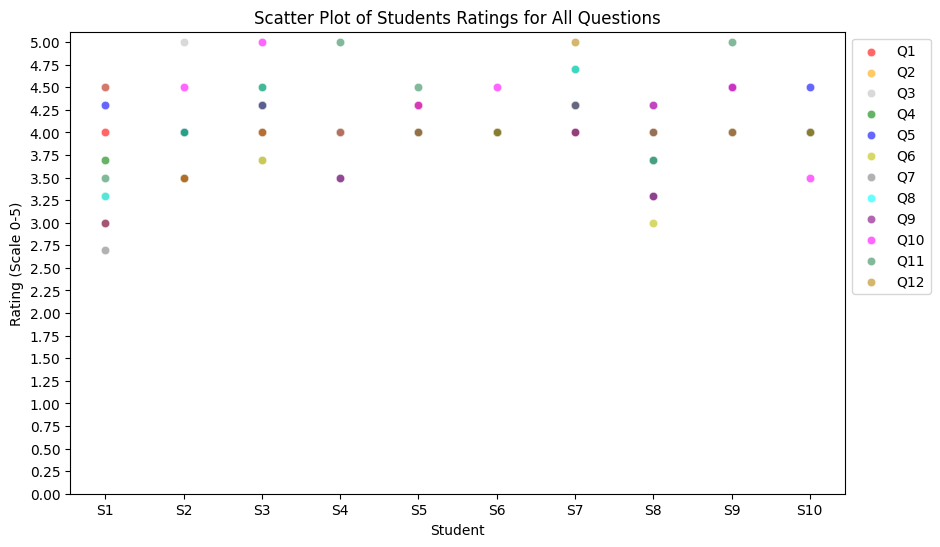

In [148]:
# creating function to place a specific color for a question
def question_color(ques_column_name):
    if ques_column_name == 'Q1':
        return 'red'
    elif ques_column_name == 'Q2':
        return 'orange'
    elif ques_column_name == 'Q3':
        return 'silver'
    elif ques_column_name == 'Q4':
        return 'green'
    elif ques_column_name == 'Q5':
        return 'blue'
    elif ques_column_name == 'Q6':
        return 'y'
    elif ques_column_name == 'Q7':
        return 'gray'
    elif ques_column_name == 'Q8':
        return 'aqua'
    elif ques_column_name == 'Q9':
        return 'purple'
    elif ques_column_name == 'Q10':
        return 'magenta'
    elif ques_column_name == 'Q11':
        return 'seagreen'
    else:
        return 'darkgoldenrod'

# Creating a scatter plot for each question
plt.figure(figsize=(10, 6))
for column in ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12']:
    sns.scatterplot(x=student_data['Student'], y=column, data=student_data, color=question_color(column), label=column, alpha=0.6)

# setting major ticks for y-axis
plt.yticks([0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 3.75, 4.00, 4.25, 4.50, 4.75, 5.00], ['0.00', '0.25', '0.50', '0.75', '1.00', '1.25', '1.50', '1.75', '2.00', '2.25', '2.50', '2.75', '3.00', '3.25', '3.50', '3.75', '4.00', '4.25', '4.50', '4.75', '5.00'])

# Add labels and title
plt.xlabel('Student')
plt.ylabel('Rating (Scale 0-5)')
plt.title('Scatter Plot of Students Ratings for All Questions')

# adjusting legen
legend = plt.legend(bbox_to_anchor=(1, 1), loc = 'upper left')

plt.show()

In [149]:
# creating function to place a specific color for a question
def question_color(ques_column_name):
    color_dict = {
        'Q1': 'red', 'Q2': 'orange', 'Q3': 'silver', 'Q4': 'green', 'Q5': 'blue', 
        'Q6': 'y', 'Q7': 'gray', 'Q8': 'aqua', 'Q9': 'purple', 'Q10': 'magenta',
        'Q11': 'seagreen', 'Q12': 'darkgoldenrod',
    }
    return color_dict.get(ques_column_name, 'black')  

# Define the size increments
base_size = 100
size_decrement = 30

# creating a dictionary to increase the size of the datapoint associated with each question
sizes_dict = {
    'Q1': base_size,
    'Q2': base_size - size_decrement,
    'Q3': base_size - 2 * size_decrement,
    'Q4': base_size - 3 * size_decrement,
    'Q5': base_size - 4 * size_decrement,
    'Q6': base_size - 5 * size_decrement,
    'Q7': base_size - 6 * size_decrement,
    'Q8': base_size - 7 * size_decrement,
    'Q9': base_size - 8 * size_decrement,    
    'Q10': base_size - 9 * size_decrement,
    'Q11': base_size - 10 * size_decrement,
    'Q12': base_size - 11 * size_decrement,
} 

# Creating a scatter plot for each question
plt.figure(figsize=(10, 6))
for column in ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12']:
    sns.scatterplot(x=student_data['Student'], y=column, data=student_data, color=question_color(column), s=sizes_dict[column], label=column, alpha=0.6)

# setting major ticks for y-axis
plt.yticks([0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 3.75, 4.00, 4.25, 4.50, 4.75, 5.00], ['0.00', '0.25', '0.50', '0.75', '1.00', '1.25', '1.50', '1.75', '2.00', '2.25', '2.50', '2.75', '3.00', '3.25', '3.50', '3.75', '4.00', '4.25', '4.50', '4.75', '5.00'])

# Add labels and title
plt.xlabel('Student')
plt.ylabel('Rating (Scale 0-5)')
plt.title('Scatter Plot of Students Ratings for All Questions')

# adjusting legen
legend = plt.legend(bbox_to_anchor=(1, 1), loc = 'upper left')

plt.show()

ValueError: need at least one array to concatenate

<Figure size 1000x600 with 1 Axes>

DataFrame:
  Students   Q1   Q2   Q3   Q4   Q5
0       S1  4.5  3.5  5.0  4.0  3.0
1       S2  4.5  4.5  4.5  4.5  4.5
2       S3  5.0  4.5  3.5  3.0  4.0
3       S4  2.5  2.0  4.0  3.5  2.5


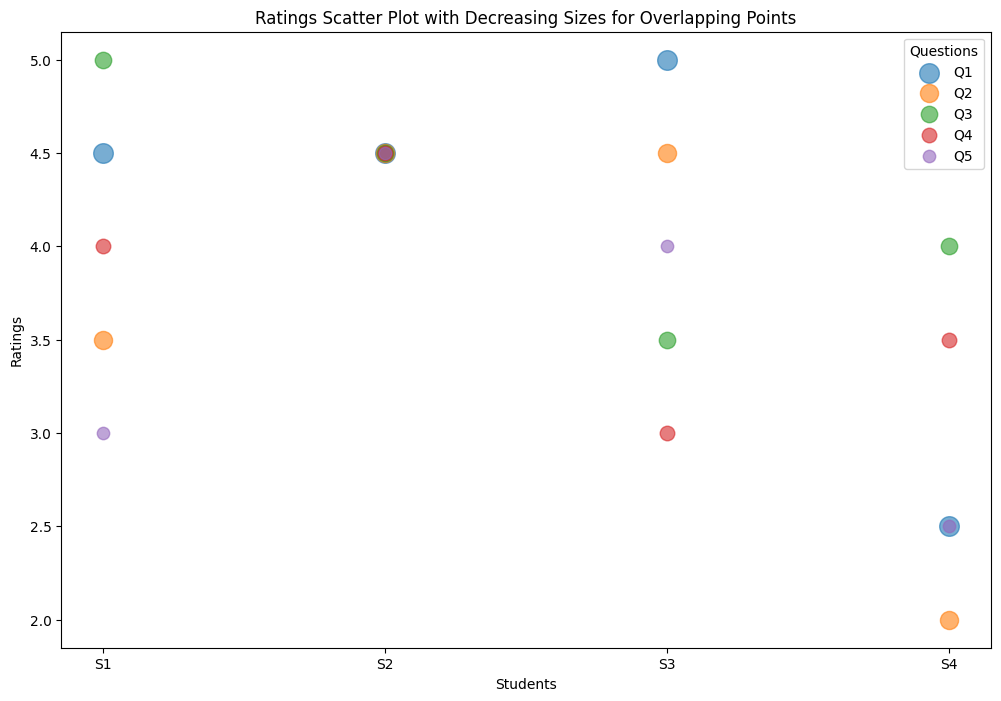

In [152]:
# ChatGPT Sample Code

# Create the dataset with ratings between 0 and 5
data = {
    'Students': ['S1', 'S2', 'S3', 'S4'],
    'Q1': [4.5, 4.5, 5.0, 2.5],
    'Q2': [3.5, 4.5, 4.5, 2.0],
    'Q3': [5.0, 4.5, 3.5, 4.0],
    'Q4': [4.0, 4.5, 3.0, 3.5],
    'Q5': [3.0, 4.5, 4.0, 2.5]
}

df = pd.DataFrame(data)

# Display the dataframe
print("DataFrame:")
print(df)

# Define the size increments for decreasing sizes
base_size = 200
size_decrement = 30

# Prepare the plot
plt.figure(figsize=(12, 8))

# Define a dictionary for sizes with decreasing sizes
sizes_dict = {
    'Q1': base_size,
    'Q2': base_size - size_decrement,
    'Q3': base_size - 2 * size_decrement,
    'Q4': base_size - 3 * size_decrement,
    'Q5': base_size - 4 * size_decrement
}

# Plot each question's data points
for question in ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']:
    plt.scatter(df['Students'], df[question], 
                s=sizes_dict[question], label=question, alpha=0.6)

# Add labels and legend
plt.xlabel('Students')
plt.ylabel('Ratings')
plt.title('Ratings Scatter Plot with Decreasing Sizes for Overlapping Points')
plt.legend(title='Questions')

# Show the plot
plt.show()

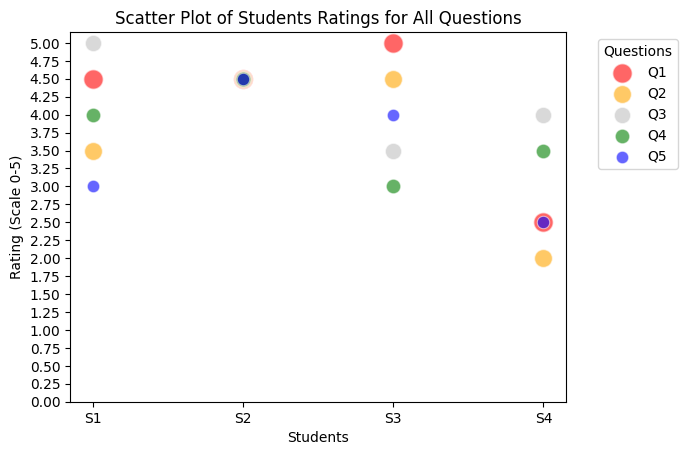

In [153]:
# Create the dataset with ratings between 0 and 5
data = {
    'Students': ['S1', 'S2', 'S3', 'S4'],
    'Q1': [4.5, 4.5, 5.0, 2.5],
    'Q2': [3.5, 4.5, 4.5, 2.0],
    'Q3': [5.0, 4.5, 3.5, 4.0],
    'Q4': [4.0, 4.5, 3.0, 3.5],
    'Q5': [3.0, 4.5, 4.0, 2.5]
}

df = pd.DataFrame(data)

# Function to assign specific colors to questions
def question_color(ques_column_name):
    color_dict = {
        'Q1': 'red', 'Q2': 'orange', 'Q3': 'silver', 'Q4': 'green', 'Q5': 'blue',
    }
    return color_dict.get(ques_column_name, 'black')

# Define the size increments for decreasing sizes
base_size = 200
size_decrement = 30

# Creating a dictionary to decrease the size of the datapoint associated with each question
sizes_dict = {
    'Q1': base_size,
    'Q2': base_size - size_decrement,
    'Q3': base_size - 2 * size_decrement,
    'Q4': base_size - 3 * size_decrement,
    'Q5': base_size - 4 * size_decrement,
}

# Create a scatter plot for each question
#plt.figure(figsize=(12, 8))
for column in ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']:
    sns.scatterplot(x='Students', y=column, data=df, color=question_color(column),
                    s=sizes_dict[column], label=column, alpha=0.6)

# Setting major ticks for y-axis
plt.yticks([0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 3.75, 4.00, 4.25, 4.50, 4.75, 5.00], ['0.00', '0.25', '0.50', '0.75', '1.00', '1.25', '1.50', '1.75', '2.00', '2.25', '2.50', '2.75', '3.00', '3.25', '3.50', '3.75', '4.00', '4.25', '4.50', '4.75', '5.00'])

# Add labels and title
plt.xlabel('Students')
plt.ylabel('Rating (Scale 0-5)')
plt.title('Scatter Plot of Students Ratings for All Questions')

# Adjusting legend
plt.legend(title='Questions', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()